In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy as apy
import ugradio

In [3]:
import time
time.time()

1676054671.2649539

In [7]:
apy.time?

In [16]:
local_now =ugradio.timing.local_time()
print(local_now)

Fri Feb 10 11:33:59 2023


In [17]:
print(local_now)

Fri Feb 10 11:33:59 2023


In [11]:
ugradio.timing?

In [13]:
import astropy.units as u
from astropy.coordinates import SkyCoord

In [ ]:
def gal_to_hor(long, lat):
    gc = SkyCoord(l=long*u.degree, b=lat*u.degree, frame = 'galactic')
    

In [15]:
SkyCoord?

In [19]:
np.array([0.,0,0])

array([0., 0., 0.])

In [26]:
data = np.load('hydrogen_sample_3.npy')

In [31]:
data = data
print(data.shape)

(2048, 2048)


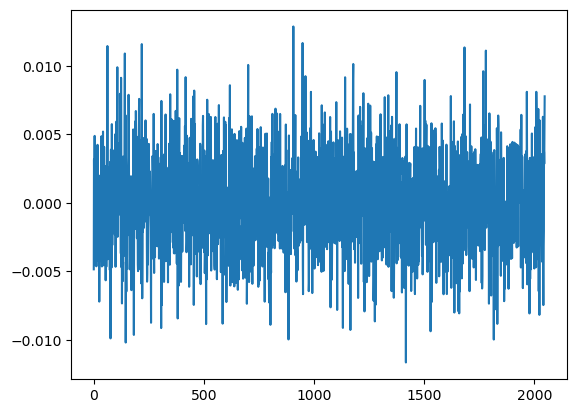

In [29]:
avg = np.average(data, axis = 0)
avg = avg - avg.mean()
plt.plot(avg)
plt.show()
#print(avg)

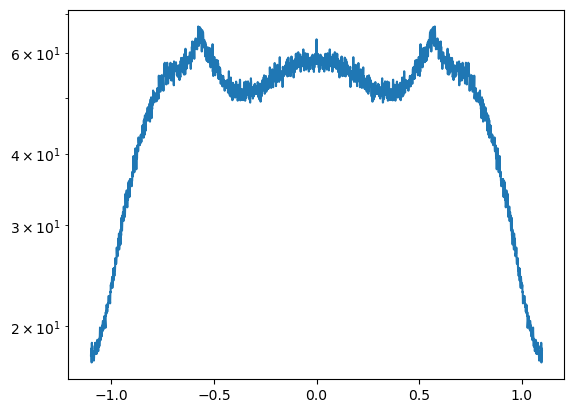

In [34]:
power = np.fft.fft(data)
power = np.fft.fftshift(power)
power = abs(power)**2
avg = np.average(power, axis = 0)
fft_freq = np.fft.fftshift(np.fft.fftfreq(2048,1/2.2))
plt.plot(fft_freq, avg)
plt.yscale('log')
plt.show()

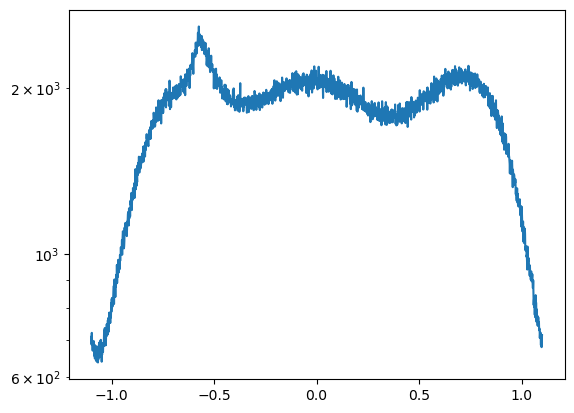

In [35]:
data = np.load('hydrogen_sample_4.npy')
power = np.fft.fft(data)
power = np.fft.fftshift(power)
power = abs(power)**2
avg = np.average(power, axis = 0)
fft_freq = np.fft.fftshift(np.fft.fftfreq(2048,1/2.2))
plt.plot(fft_freq, avg)
plt.yscale('log')
plt.show()